In [4]:
# Importing required libraries
! pip install seaborn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [6]:
# Import the dataset
import requests 

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

file_name = "laptops.csv"

response = requests.get(file_path)

# Make sure the dataset succesfully downloaded (status code 200)
if response.status_code == 200:
    # Open file in 'write binary' (wb) and save the content
    with open(file_name, "wb") as f:
        f.write(response.content)
    print(f"File '{file_name}' berhasil diunduh.")
    
# Directly load file into pandas dataframe
    df = pd.read_csv(file_name)
    print("DataFrame berhasil dibuat.")
    df.head()
else:
    print(f"Gagal mengunduh file. Status code: {response.status_code}")

File 'laptops.csv' berhasil diunduh.
DataFrame berhasil dibuat.


In [ ]:
# Make sure dataset loaded to dataframe
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


(0.0, 3974.15)

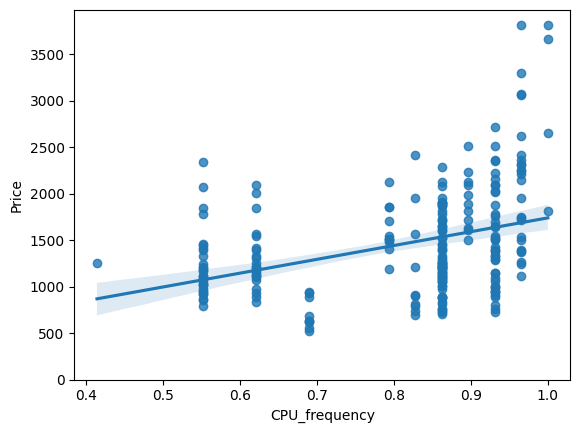

In [14]:
sns.regplot(x='CPU_frequency', y='Price', data=df)
plt.ylim(0,)

--- Analyzing Relationship: CPU_frequency vs. Price ---
Correlation Value: 0.3667
Pearson Coefficient: 0.3667, P-value: 0.0000


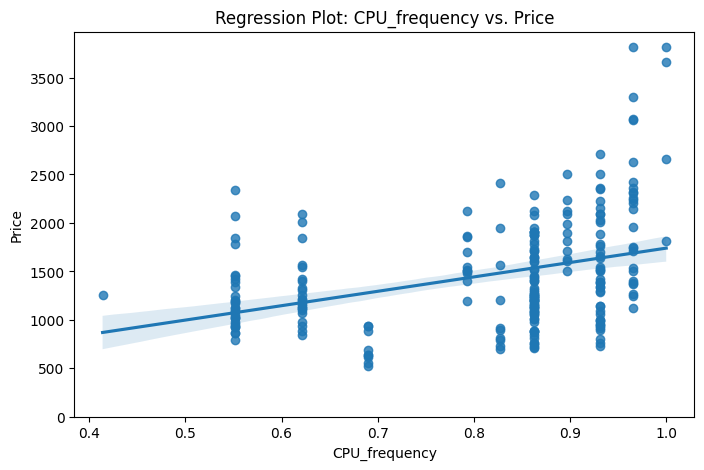



--- Analyzing Relationship: Screen_Size_inch vs. Price ---
Correlation Value: -0.1106
Pearson Coefficient: -0.1106, P-value: 0.0885


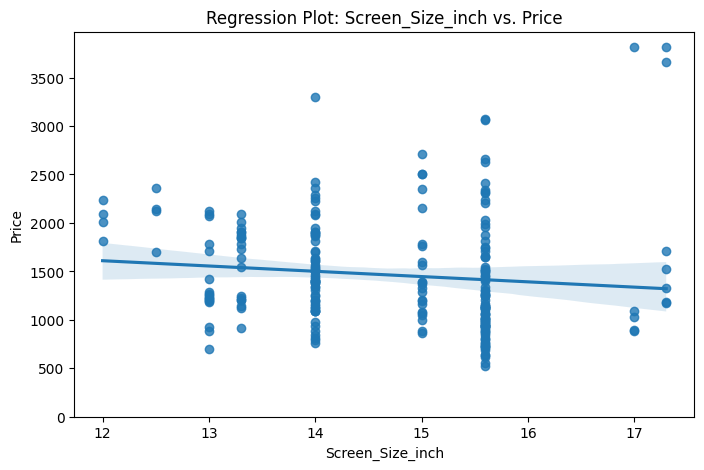



--- Analyzing Relationship: Weight_pounds vs. Price ---
Correlation Value: -0.0503
Pearson Coefficient: -0.0503, P-value: 0.4398


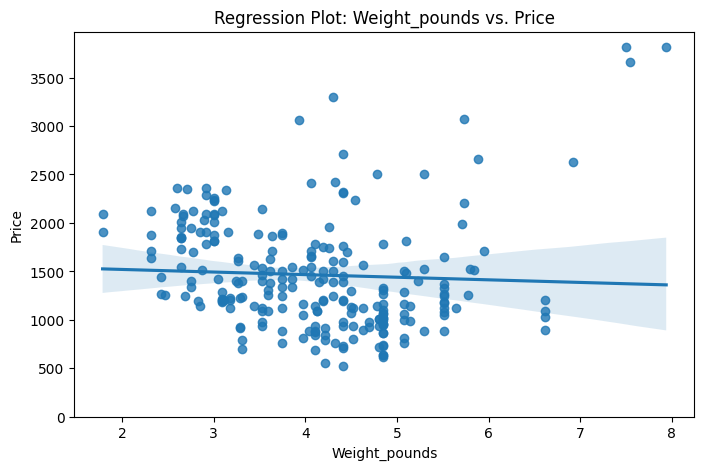

In [15]:
# Create a list of variables to be analyzed against 'Price'
features_to_analyze = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]
target_variable = "Price"

# Start a loop for each feature in the list
for feature in features_to_analyze:
    print(f"--- Analyzing Relationship: {feature} vs. {target_variable} ---")
    
    # --- Calculate and Print Correlation ---
    # Use the .corr() method directly on two Series (columns)
    correlation = df[feature].corr(df[target_variable])
    print(f"Correlation Value: {correlation:.4f}") # Rounded to 4 decimal places

    # You can also use scipy to get the p-value
    pearson_coef, p_value = stats.pearsonr(df[feature], df[target_variable])
    print(f"Pearson Coefficient: {pearson_coef:.4f}, P-value: {p_value:.4f}")

    # --- Create Regression Plot ---
    # plt.figure() is used to ensure each plot is drawn on a new canvas
    plt.figure(figsize=(8, 5)) 
    sns.regplot(x=feature, y=target_variable, data=df)
    plt.ylim(0,) # Set the lower limit of the y-axis to 0
    plt.title(f'Regression Plot: {feature} vs. {target_variable}')
    
    # plt.show() will display the plot immediately after it's created
    plt.show() 
    
    # Add a separator for output readability
    print("\n" + "="*60 + "\n")

--- Generating Box Plot for: Category vs. Price ---


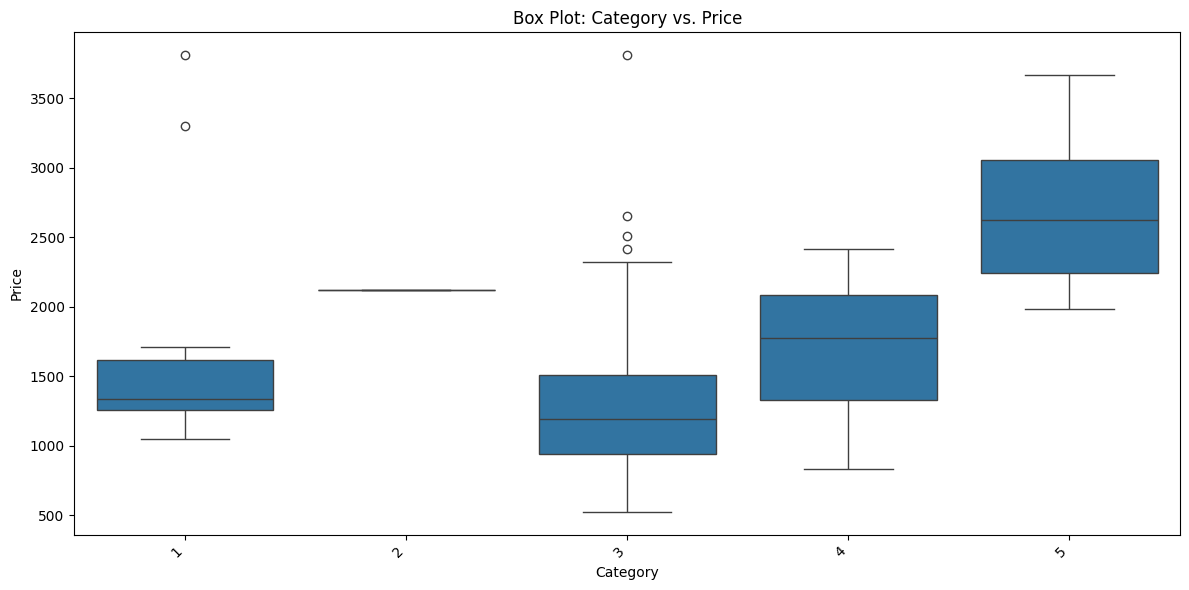



--- Generating Box Plot for: GPU vs. Price ---


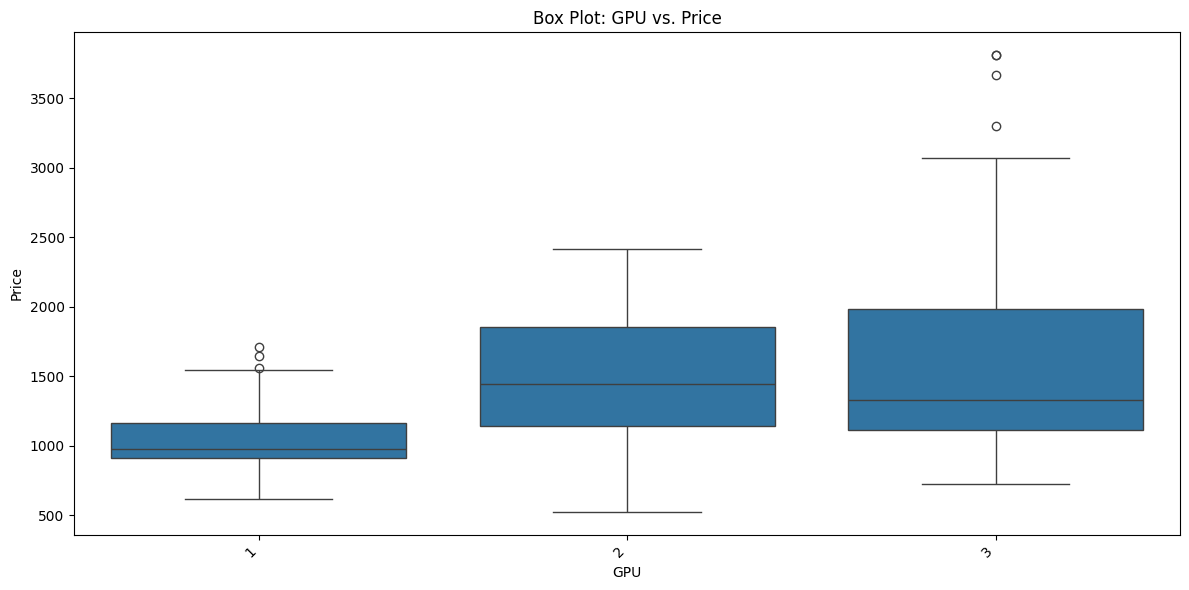



--- Generating Box Plot for: OS vs. Price ---


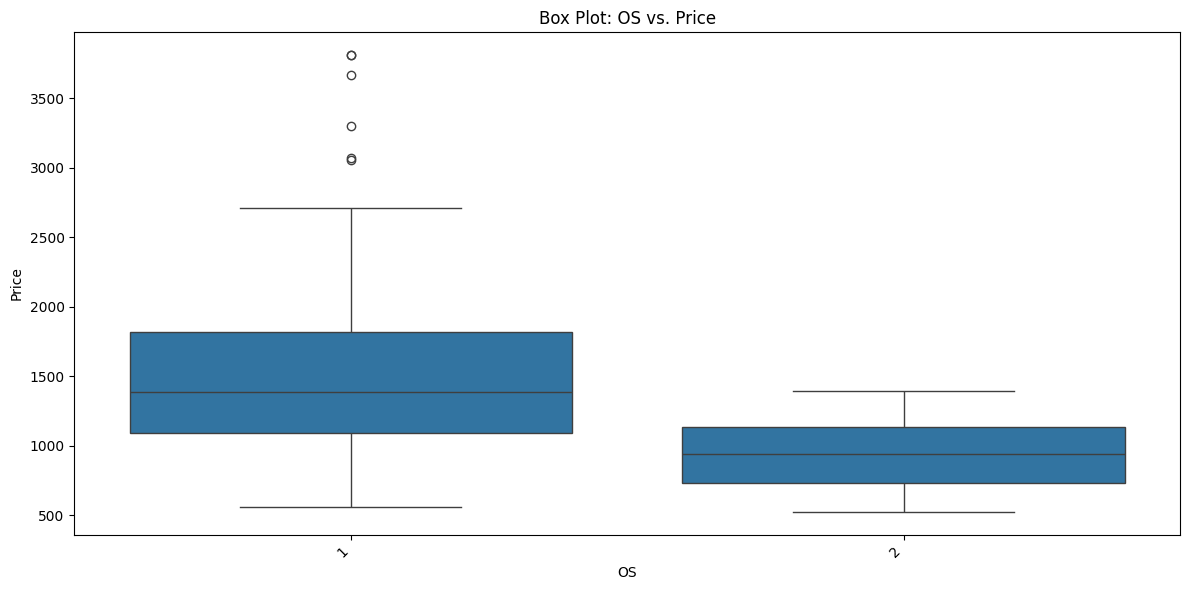



--- Generating Box Plot for: CPU_core vs. Price ---


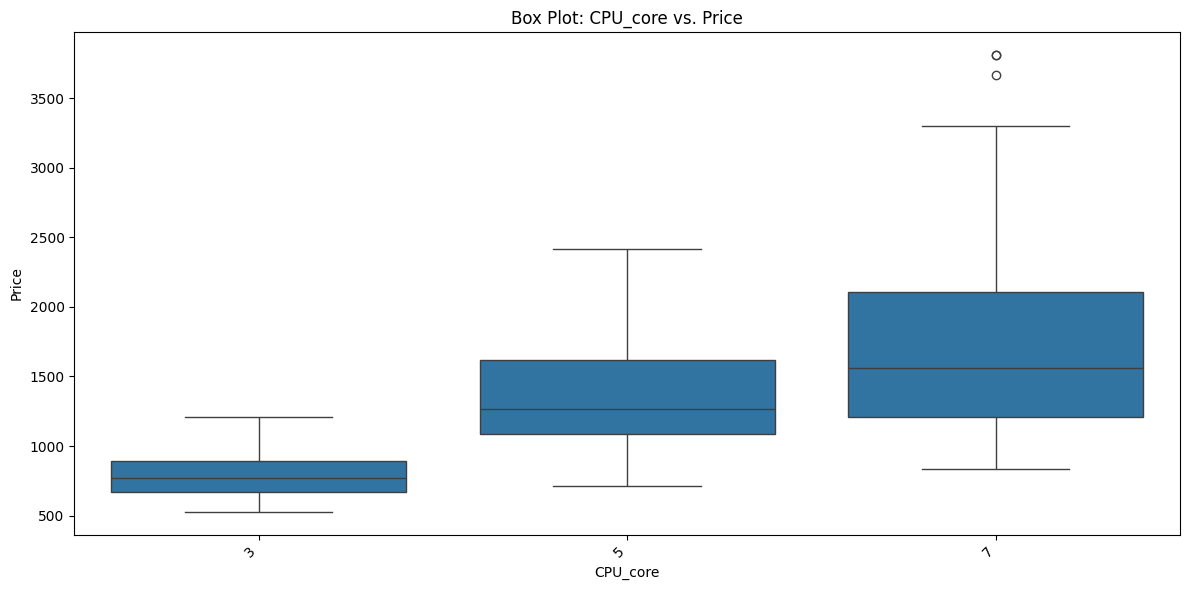



--- Generating Box Plot for: RAM_GB vs. Price ---


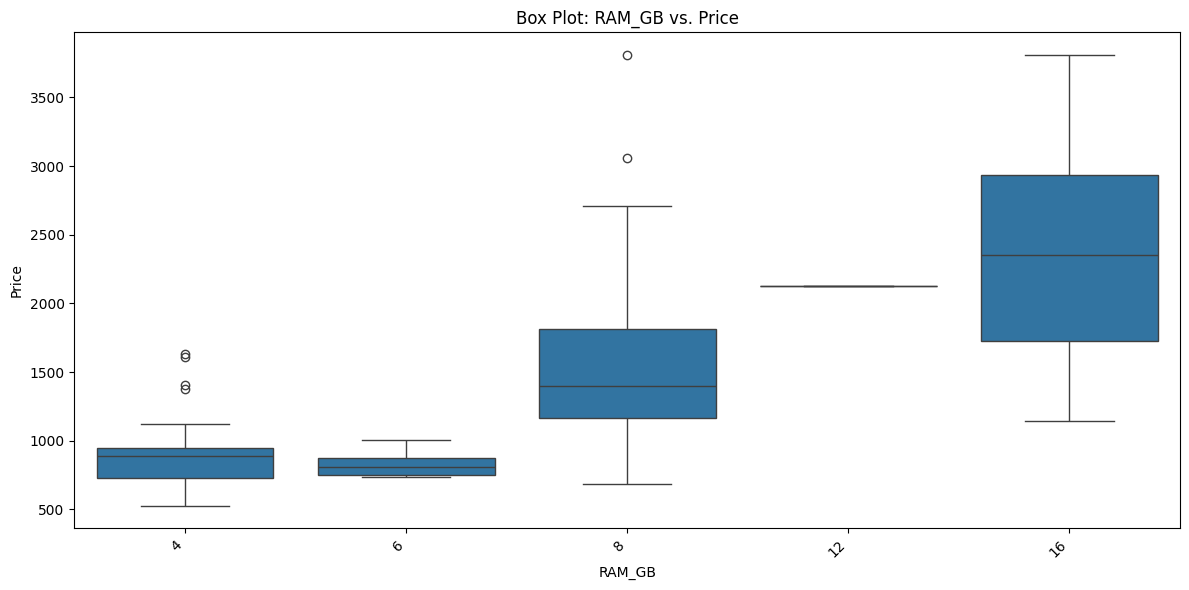



--- Generating Box Plot for: Storage_GB_SSD vs. Price ---


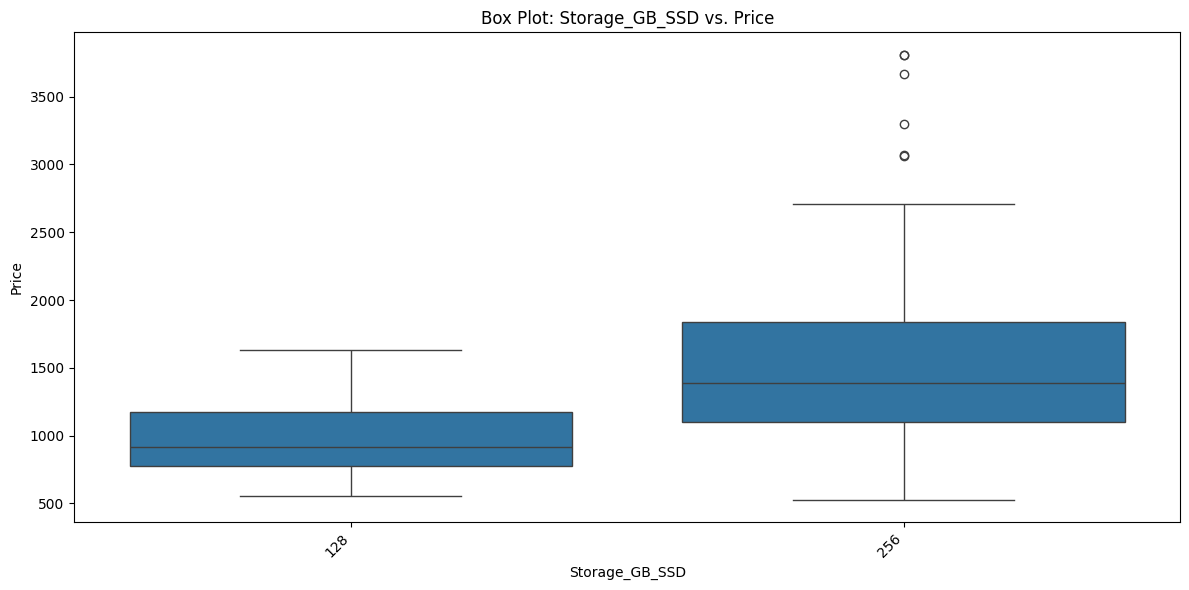

In [16]:
# Create a list of categorical features to be analyzed against 'Price'
categorical_features = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
target_variable = "Price"

# 2. Start a loop for each feature in the list
for feature in categorical_features:
    print(f"--- Generating Box Plot for: {feature} vs. {target_variable} ---")
    
    # --- Create Box Plot ---
    # Create a new figure for each plot to prevent them from overlapping.
    # A larger figure size is good for readability, especially with many categories.
    plt.figure(figsize=(12, 6)) 
    
    sns.boxplot(x=feature, y=target_variable, data=df)
    
    plt.title(f'Box Plot: {feature} vs. {target_variable}')
    
    # Rotate x-axis labels if category names are long or numerous to prevent overlap
    plt.xticks(rotation=45, ha='right') 
    
    # Ensure the layout is tight to fit all labels
    plt.tight_layout()

    # Show the plot
    plt.show()
    
    # Add a separator for output readability
    print("\n" + "="*60 + "\n")

In [ ]:
# Descriptive statistics
df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


In [22]:
# Group the "GPU", "CPU_core", and "Price"
df_gptest = df[['GPU', 'CPU_core', 'Price']]
grouped_test1 = df_gptest.groupby(['GPU', 'CPU_core'], as_index=False).mean()
grouped_test1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [23]:
# Create the pivot table
grouped_pivot = grouped_test1.pivot(index='GPU', columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

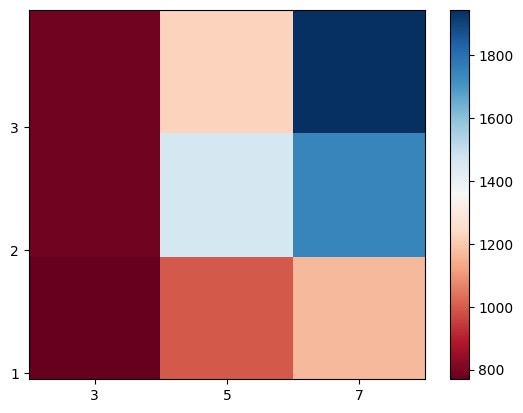

In [25]:
# Create the plot for the pivot table
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[1]) + 0.05, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)


In [26]:
# Using scipy.stats.pearsonr() function to evaluat the PC and p-values for each parameter

for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.681560628842973e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.502463350713219e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810302  with a P-value of P = 0.00014898923191723976
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118273  with a P-value of P = 0.0885339784683062
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751551  with a P-value of P = 0.43976938534338894
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355115  with a P-value of P = 7.912950127009359e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P = 0.000569664255924674
GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273  wi